Structures with subwavelength features will have more significant losses as a result of lithography than structures with smooth features

In this tutorial we will use an SWG Finger supported waveguide. These SWG Fingers have numerous applications but can suffer from significant loss in DUV fabrication. 

In [2]:
import os, sys
sys.path.append('../../')
from config import Config
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path

import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimization import Optimization
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt.optimizers.generic_optimizers import ScipyOptimizers
from lumopt_gl.optimization import OptimizationGL
from lumopt_gl.utilities.lithography import LithographyOptimizer

c:\Users\shahe\Documents\Lumopt_FAID\venv\lib\site-packages\paramiko\pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\shahe\Documents\Lumopt_FAID\venv\lib\site-packages\paramiko\transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [4]:
def optimizer2D(polygon, base_script, max_iter = 5):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = ScipyOptimizers(max_iter = max_iter, method = 'L-BFGS-B', scaling_factor = 1e6, pgtol = 1e-5)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 40):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    optimizer = ScipyOptimizers(max_iter = max_iter, method = 'L-BFGS-B', scaling_factor = 1e6, pgtol = 1e-5)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

In [5]:
from geometries.SWG_to_strip import SWG_to_strip

SWG_finger, base_script = SWG_to_strip(dimension = 2, num_gratings = 20, static_gratings = 3)

opt = optimizer2D(SWG_finger, base_script)

Accurate interface detection enabled


Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]]
start = [0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.091 0.112 0.133 0.154]
Making forward solve
Making adjoint solve
[1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07
 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07 1.75e-07
 1.75e-07 1.75e-07 1.75e-07 1.75e-07 9.10e-08 1.12e-07 1.33e-07 1.54e-07]
Running solves
Processing forward solve
FOM = 0.9417857794682688
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-08
.............

KeyboardInterrupt: 

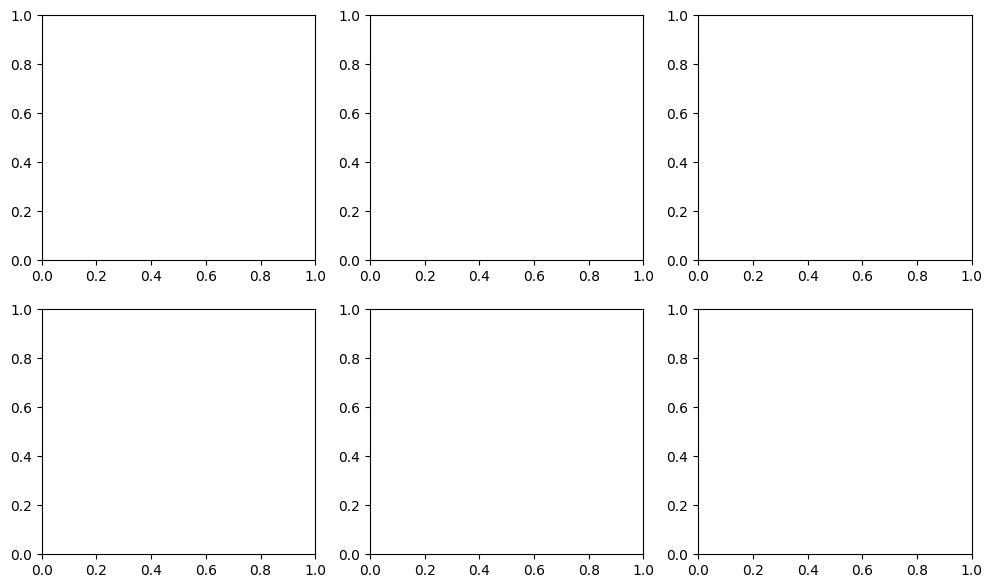

In [6]:
opt.run()

In [6]:
opt.initialize()

Wavelength range of source object will be superseded by the global settings.


KeyboardInterrupt: 

In [ ]:
opt.run_forward_simulation()

In [10]:
opt.geometry.lithography_model = LithographyOptimizer(model = 'DUV')

We see a significant performance decrease.

Wavelength range of source object will be superseded by the global settings.


Prediction: 100%|██████████████████████████████| 100/100 [00:27<00:00,  3.62%/s]


Saving GDS to 'c:\Users\shahe\Documents\GitHub\Lumopt_GL\results/result.gds'...


KeyboardInterrupt: 

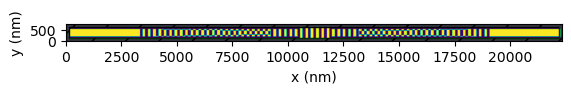

In [12]:
opt.run()

Now we will run the lithography optimizer. 

In [ ]:
opt = optimizer3D(SWG_finger, base_script)
opt.geometry.lithography_model = LithographyOptimizer(model = 'DUV')
opt.run()

The code below just repeats the same process for a segmented waveguide.

In [ ]:
from geometries.SWG_finger import SWG_finger_geo

In [ ]:

SWG_taper, base_script = SWG_to_strip(dimension = 2, num_gratings = 20, static_gratings = 3)
opt3 = optimizer2D(SWG_taper, base_script)

In [ ]:
opt3.initialize()

In [ ]:
opt3.run()

In [ ]:
opt3.run_forward_simulation()

In [ ]:
opt3.geometry.lithography_model = LithographyOptimizer(model = 'DUV')
# opt.initialize('working_dir = ')
opt3.run_forward_simulation()

In [ ]:
opt3 = optimizer2D(SWG_taper, base_script)
opt.geometry.lithography_model = LithographyOptimizer(model = 'DUV')
opt.run()